# Bone Marrow Transplant Data Analysis pt. 2
## Data Loading

### Initial Data Exploration
The dataset contains bone marrow transplant cases with preprocessed features (check eda.ipynb):
- Cleaned missing values
- Winsorized numerical values to handle outliers
- Encoded categorical variables


In [ ]:
import pandas as pd
import numpy as np

# Load preprocessed data from CSV
df = pd.read_csv("../data/winsorized_data.csv")

# Display first few rows to verify data loading
df.head()


,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,14.130301,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,14.130301,0.17,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',34.10,3.972255,12.23,10.5,14.0,14.0,1000000.0,2043.0,0.0


### Data Distribution Analysis
Examining the balance between survival outcomes in our dataset. This will help us:
- Identify if we have class imbalance
- Determine if we need resampling techniques
- Guide our model selection strategy

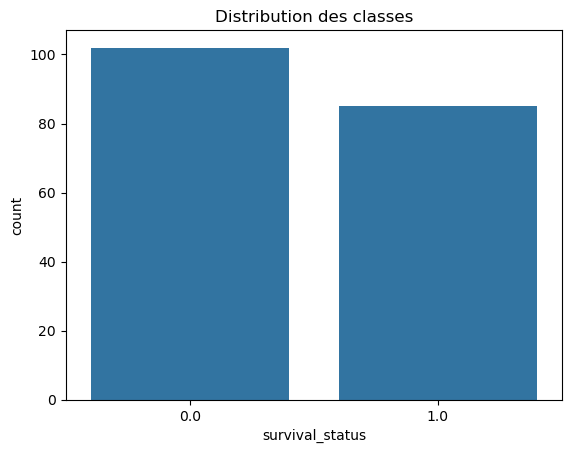

survival_status
0.0    0.545455
1.0    0.454545
Name: proportion, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate class proportions
sns.countplot(x=df["survival_status"])
plt.title("Distribution des classes")
plt.show()

# Calculate class proportions
df["survival_status"].value_counts(normalize=True)


## Class Imbalance Handling Techniques
In this part, we implement different approaches to handle class imbalance in our bone marrow transplant dataset:
### Oversampling (SMOTE) implementation


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Confirm your data is clean and ready
# All features should now be numeric with no missing values
print("Shape of cleaned dataset:", X_imputed.shape)

# Step 2: Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Check class distribution before SMOTE
print("Original class distribution in training set:")
print(pd.Series(y_train).value_counts())

# Step 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Verify the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Shape of cleaned dataset: (187, 35)
Original class distribution in training set:
survival_status
0.0    81
1.0    68
Name: count, dtype: int64
Class distribution after SMOTE:
survival_status
1.0    81
0.0    81
Name: count, dtype: int64


### Undersampling implementation


In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the cleaned data first
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution before undersampling
print("Original class distribution in training set:")
print(pd.Series(y_train).value_counts())

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts())


Original class distribution in training set:
survival_status
0.0    81
1.0    68
Name: count, dtype: int64
Class distribution after undersampling:
survival_status
0.0    68
1.0    68
Name: count, dtype: int64


### Class-weight Adjustment Implementation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())

# Compute class weights (automatically handles imbalance)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weight_dict)

# Train model with class weights
# Example with Random Forest (replace with your preferred model)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weight_dict  # Apply the class weights here
)

# Fit the model with original (imbalanced) data
model.fit(X_train, y_train)


Class distribution in training set:
survival_status
0.0    81
1.0    68
Name: count, dtype: int64
Class weights: {0.0: 0.9197530864197531, 1.0: 1.0955882352941178}


RandomForestClassifier(class_weight={0.0: 0.9197530864197531,
                                     1.0: 1.0955882352941178},
                       random_state=42)

## Feature Selection and Correlation Analysis

### Objective
Analyze feature relationships and select optimal predictors for our bone marrow transplant model by:
- Identifying and handling correlated features
- Evaluating feature importance
- Making data-driven selection decisions

### Methodology
1. **Correlation Analysis**
   - Generated correlation matrix using Pearson correlation
   - Visualized relationships through heatmap
   - Identified highly correlated pairs (|r| ≥ 0.8)

2. **Feature Selection Process**
   - Correlation-based removal
   - Univariate feature importance (F-scores)
   - Combined statistical and clinical considerations

3. **Validation Steps**
   - Cross-checked with F-test statistics
   - Ranked features by importance
   - Preserved clinically relevant features

### Results Overview
- Initial feature count
- Identified correlations
- Final selected features
- Impact on model performance

### Visualizations
- Correlation heatmap
- Feature importance rankings
- Selected vs. dropped features analysis

This analysis helps us build a more efficient and interpretable prediction model while maintaining clinical relevance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

# Convert input data to DataFrame if needed
if not isinstance(X_imputed, pd.DataFrame):
    feature_names = [f"feature_{i}" for i in range(X_imputed.shape[1])]
    X_df = pd.DataFrame(X_imputed, columns=feature_names)
else:
    X_df = X_imputed.copy()

# 1. Generate and visualize correlation matrix
correlation_matrix = X_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# 2. Identify highly correlated feature pairs
correlation_threshold = 0.8
high_corr_pairs = {}

# Find pairs with correlation above threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature_i = correlation_matrix.columns[i]
        feature_j = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) >= correlation_threshold:
            high_corr_pairs[(feature_i, feature_j)] = correlation

# Display correlation results
print(f"Number of highly correlated feature pairs (|r| >= {correlation_threshold}): {len(high_corr_pairs)}")
for pair, corr in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr:.4f}")

# 3. Select features to remove based on correlation
features_to_drop = set()

# For each correlated pair, drop the feature with higher average correlation
for (feature1, feature2), corr in high_corr_pairs.items():
    avg_corr1 = correlation_matrix[feature1].abs().mean()
    avg_corr2 = correlation_matrix[feature2].abs().mean()
    
    if avg_corr1 > avg_corr2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

print(f"\nFeatures to drop based on correlation: {features_to_drop}")

# 4. Validate feature selection using F-scores
selector = SelectKBest(f_classif, k='all')
selector.fit(X_df, y)
feature_scores = pd.DataFrame({
    'Feature': X_df.columns,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
})

# Rank features by importance
feature_scores = feature_scores.sort_values('F_Score', ascending=False)
print("\nFeature ranking based on F-scores:")
print(feature_scores)

# 5. Generate final recommendations
print("\nFinal Feature Selection Recommendations:")
for feature in features_to_drop:
    rank = feature_scores[feature_scores['Feature'] == feature].index[0]
    total_features = len(feature_scores)
    percentile = (rank / total_features) * 100
    
    if percentile <= 25:
        print(f"- {feature}: Consider keeping despite correlation (ranked {rank+1}/{total_features}, " 
              f"top {percentile:.1f}% based on F-score)")
    else:
        print(f"- {feature}: Recommended to drop (ranked {rank+1}/{total_features}, " 
              f"correlation redundancy)")

# 6. Create final dataset with selected features
X_selected = X_df.drop(columns=list(features_to_drop))
print(f"\nOriginal feature count: {X_df.shape[1]}")
print(f"Selected feature count: {X_selected.shape[1]}")


# Return selected features dataset
X_selected.head()

Number of highly correlated feature pairs (|r| >= 0.8): 13
feature_2 and feature_3: 0.8409
feature_10 and feature_12: 0.8694
feature_16 and feature_18: 0.8459
feature_16 and feature_19: 0.9018
feature_16 and feature_20: 0.9472
feature_17 and feature_20: 0.8465
feature_19 and feature_20: 0.8747
feature_21 and feature_22: 0.8723
feature_21 and feature_23: 0.9174
feature_21 and feature_30: 0.8843
feature_22 and feature_23: 0.8886
feature_22 and feature_30: 0.8003
feature_23 and feature_30: 0.8304

Features to drop based on correlation: {'feature_20', 'feature_2', 'feature_30', 'feature_10', 'feature_16', 'feature_23', 'feature_19', 'feature_21'}

Feature ranking based on F-scores:
       Feature     F_Score       P_Value
34  feature_34  255.291345  1.126869e-36
24  feature_24   19.556631  1.663133e-05
29  feature_29   10.041136  1.791435e-03
26  feature_26    9.764486  2.066008e-03
30  feature_30    8.282208  4.474702e-03
21  feature_21    7.984537  5.236173e-03
27  feature_27    7.767792

,feature_0,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_11,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_31,feature_32,feature_33,feature_34
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,7.20,1.338760,5.38,19.0,51.0,1000000.0,999.0
1,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,...,1.0,1.0,1.000000,4.50,11.078295,0.41,16.0,37.0,1000000.0,163.0
2,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,...,1.0,1.0,1.000000,7.94,2.734462,0.42,23.0,20.0,1000000.0,435.0
3,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.820513,4.25,2.734462,0.14,23.0,29.0,1000000.0,53.0
4,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,1.0,1.000000,9.72,3.972255,13.05,14.0,14.0,1000000.0,2043.0


## Comprehensive Model Evaluation Framework

### Purpose
Evaluate multiple machine learning models with different class imbalance handling techniques for bone marrow transplant prediction.

### Components
1. **Models Being Evaluated:**
   - Random Forest Classifier
   - XGBoost Classifier
   - LightGBM Classifier
   - Support Vector Machine (SVM)

2. **Imbalance Handling Methods:**
   - Baseline (no adjustment)
   - Class Weights
   - SMOTE Oversampling
   - Random Undersampling

3. **Evaluation Metrics:**
   - AUC-ROC Score
   - Balanced Accuracy
   - Precision
   - Recall
   - F1-Score

### Output
- Detailed comparison table
- Results saved to 'model_comparison.csv'
- Cross-method performance analysis

### Evaluating RandomForestClassifier


Evaluating: Baseline

Baseline Results:
AUC-ROC: 0.9678
Balanced Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        21
         1.0       1.00      0.82      0.90        17

    accuracy                           0.92        38
   macro avg       0.94      0.91      0.92        38
weighted avg       0.93      0.92      0.92        38


Confusion Matrix:
[[21  0]
 [ 3 14]]

Evaluating: SMOTE

SMOTE Results:
AUC-ROC: 0.9832
Balanced Accuracy: 0.9118

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        21
         1.0       1.00      0.82      0.90        17

    accuracy                           0.92        38
   macro avg       0.94      0.91      0.92        38
weighted avg       0.93      0.92      0.92        38


Confusion Matrix:
[[21  0]
 [ 3 14]]

Evaluating: Undersampling

Undersampling Results:
AUC-ROC: 0.

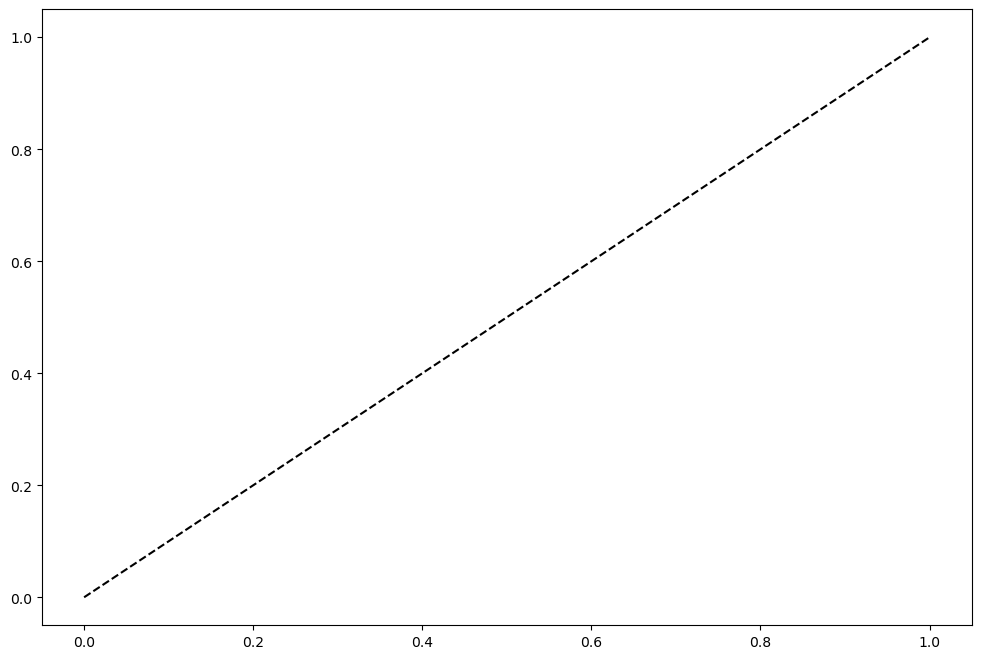

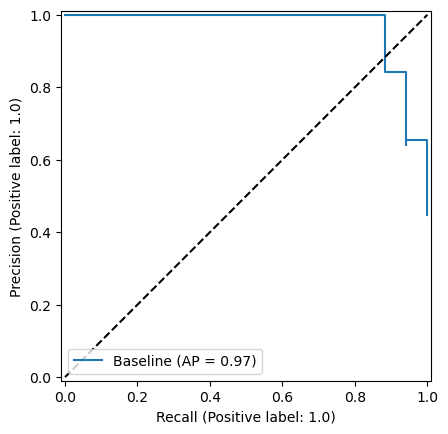

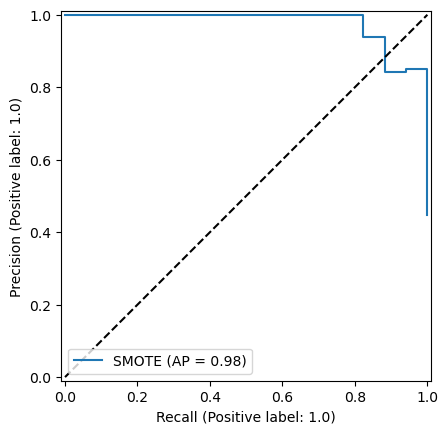

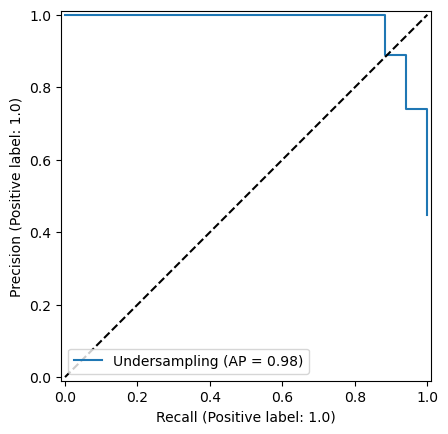

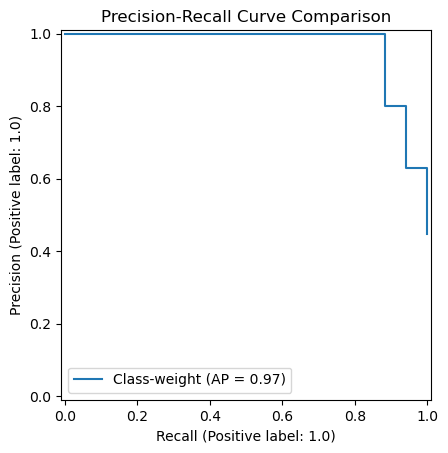

In [302]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, 
                            roc_auc_score, 
                            balanced_accuracy_score,
                            confusion_matrix,
                            PrecisionRecallDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

def evaluate_model(X_train, y_train, X_test, y_test, model_name):
    """Enhanced evaluation function with better metrics tracking"""
    
    models = {}
    print(f"\n{'='*40}\nEvaluating: {model_name}\n{'='*40}")
    
    # Model training with different strategies
    if model_name == "SMOTE":
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X_train, y_train)
        model = RandomForestClassifier(random_state=42)
        
    elif model_name == "Undersampling":
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X_train, y_train)
        model = RandomForestClassifier(random_state=42)
        
    elif model_name == "Class-weight":
        classes = np.unique(y_train)
        weights = compute_class_weight('balanced', classes=classes, y=y_train)
        class_weights = dict(zip(classes, weights))
        model = RandomForestClassifier(random_state=42, class_weight=class_weights)
        X_res, y_res = X_train, y_train  # No resampling
        
    elif model_name == "Baseline":
        model = RandomForestClassifier(random_state=42)
        X_res, y_res = X_train, y_train  # Original data
    
    # Common training procedure
    model.fit(X_res, y_res)
    
    # Enhanced evaluation metrics
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    # Classification metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_roc = roc_auc_score(y_test, y_proba)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    metrics = {
        'model_name': model_name,
        'model': model,
        'classification_report': report,
        'auc_roc': auc_roc,
        'balanced_accuracy': balanced_acc,
        'confusion_matrix': cm
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(cm)
    
    return metrics

# Usage example
methods = ["Baseline", "SMOTE", "Undersampling", "Class-weight"]
results = {}

for method in methods:
    results[method] = evaluate_model(X_train, y_train, X_test, y_test, method)

# Visual comparison
plt.figure(figsize=(12, 8))
for method in methods:
    plt.plot([0, 1], [0, 1], 'k--')
    PrecisionRecallDisplay.from_estimator(
        results[method]['model'], 
        X_test, 
        y_test, 
        name=method
    )
plt.title('Precision-Recall Curve Comparison')
plt.show()

### Evaluating XGBoost 


Evaluating XGBoost with Baseline

Method: Baseline
AUC-ROC: 0.9468
Balanced Accuracy: 0.9174

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        21
         1.0       0.94      0.88      0.91        17

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


Confusion Matrix:
[[20  1]
 [ 2 15]]

Evaluating XGBoost with SMOTE

Method: SMOTE
AUC-ROC: 0.9440
Balanced Accuracy: 0.9174

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        21
         1.0       0.94      0.88      0.91        17

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


Confusion Matrix:
[[20  1]
 [ 2 15]]

Evaluating XGBoost with Undersampling



<Figure size 1200x800 with 0 Axes>

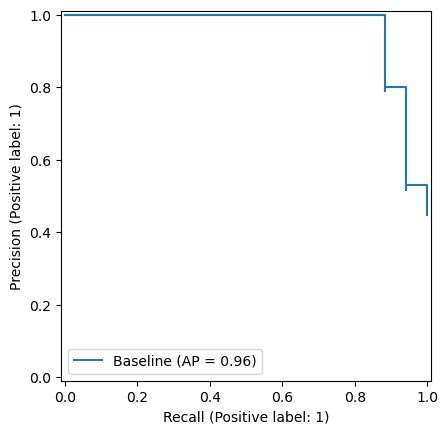

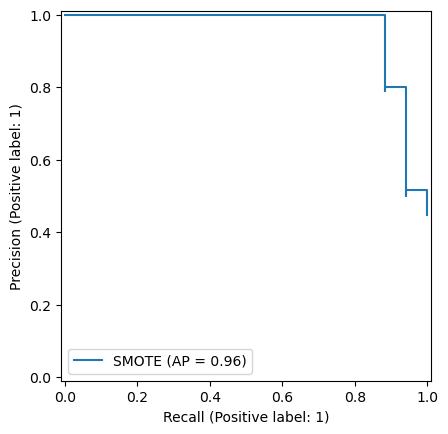

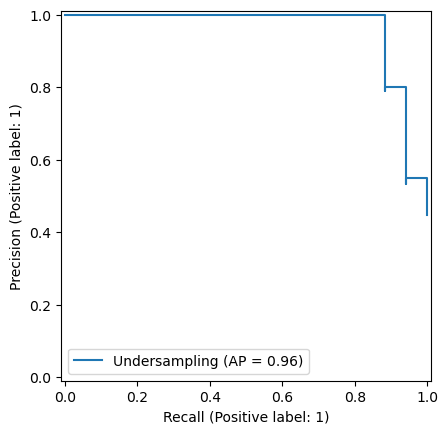

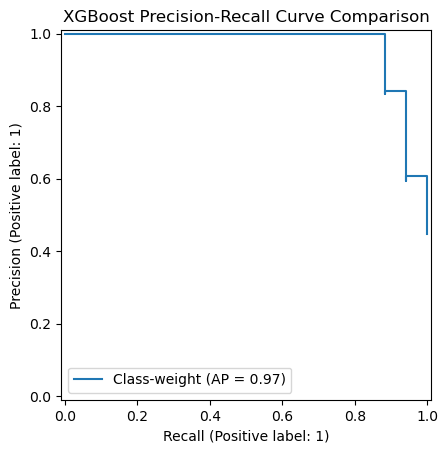

<Figure size 1000x600 with 0 Axes>

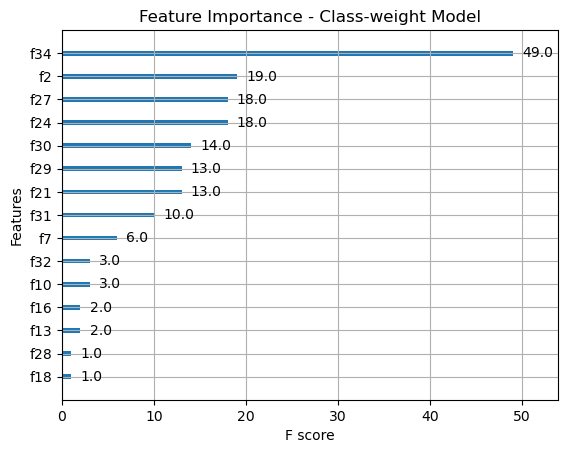

In [304]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import (classification_report, 
                            roc_auc_score,
                            balanced_accuracy_score,
                            confusion_matrix,
                            PrecisionRecallDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

def evaluate_xgb_model(X_train, y_train, X_test, y_test, method):
    """Enhanced XGBoost evaluation with medical performance metrics"""
    
    print(f"\n{'='*40}\nEvaluating XGBoost with {method}\n{'='*40}")
    
    # Handle class imbalance
    if method == "Baseline":
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            random_state=42,
            eval_metric='logloss',
            scale_pos_weight=1  # Default no weighting
        )
        model.fit(X_train, y_train)
        
    elif method == "Class-weight":
        # Calculate appropriate scale_pos_weight
        ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            random_state=42,
            eval_metric='logloss',
            scale_pos_weight=ratio
        )
        model.fit(X_train, y_train)
        
    elif method == "SMOTE":
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_train, y_train)
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            random_state=42,
            eval_metric='logloss'
        )
        model.fit(X_res, y_res)
        
    elif method == "Undersampling":
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X_train, y_train)
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            random_state=42,
            eval_metric='logloss'
        )
        model.fit(X_res, y_res)
    
    # Generate predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate medical performance metrics
    metrics = {
        'auc_roc': roc_auc_score(y_test, y_proba),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Print detailed report
    print(f"\nMethod: {method}")
    print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
    print(f"Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    
    return model, metrics

# Compare different methods
methods = ["Baseline", "SMOTE", "Undersampling", "Class-weight"]
results = {}

for method in methods:
    model, metrics = evaluate_xgb_model(X_train, y_train, X_test, y_test, method)
    results[method] = {
        'model': model,
        'metrics': metrics
    }

# Visual comparison of precision-recall curves
plt.figure(figsize=(12, 8))
for method in methods:
    PrecisionRecallDisplay.from_estimator(
        results[method]['model'],
        X_test,
        y_test,
        name=method
    )
plt.title('XGBoost Precision-Recall Curve Comparison')
plt.show()

# Feature importance for best performing model
best_method = max(results, key=lambda x: results[x]['metrics']['auc_roc'])
plt.figure(figsize=(10, 6))
xgb.plot_importance(results[best_method]['model'], max_num_features=15)
plt.title(f'Feature Importance - {best_method} Model')
plt.show()

### Evaluating SVM


Evaluating SVM with Baseline

Method: Baseline
AUC-ROC: 0.9720
Balanced Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        21
         1.0       0.00      0.00      0.00        17

    accuracy                           0.55        38
   macro avg       0.28      0.50      0.36        38
weighted avg       0.31      0.55      0.39        38


Confusion Matrix:
[[21  0]
 [17  0]]

Evaluating SVM with SMOTE

Method: SMOTE
AUC-ROC: 0.5000
Balanced Accuracy: 0.7619

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.69        21
         1.0       0.63      1.00      0.77        17

    accuracy                           0.74        38
   macro avg       0.81      0.76      0.73        38
weighted avg       0.83      0.74      0.73        38


Confusion Matrix:
[[11 10]
 [ 0 17]]

Evaluating SVM with Undersampling

Method: Unde

<Figure size 1200x800 with 0 Axes>

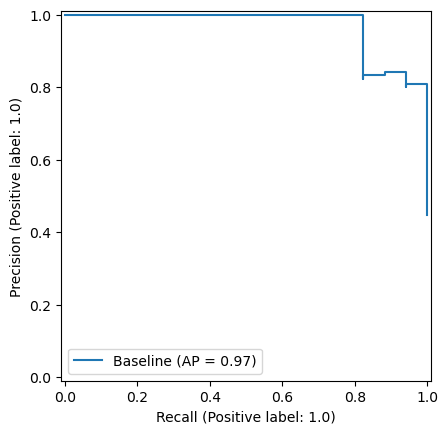

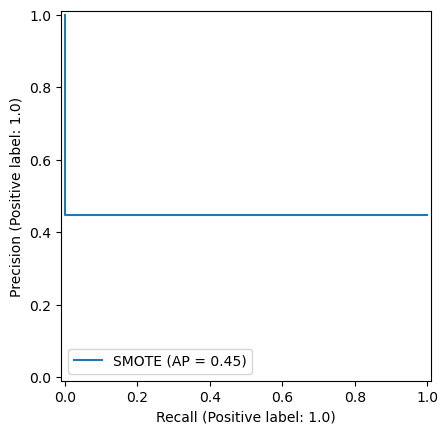

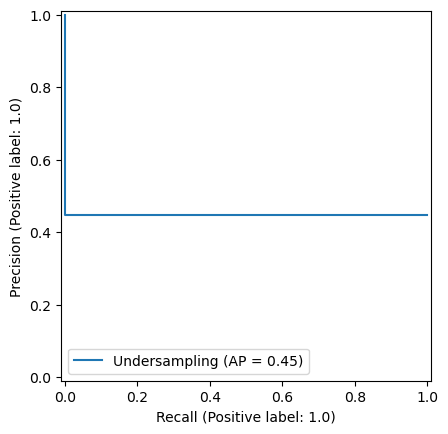

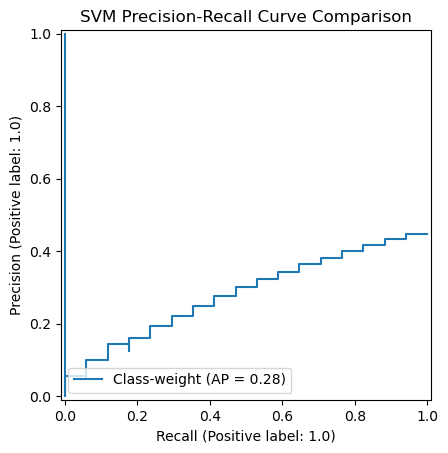

In [310]:
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, 
                            roc_auc_score,
                            balanced_accuracy_score,
                            confusion_matrix,
                            PrecisionRecallDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np

def evaluate_svm_model(X_train, y_train, X_test, y_test, method):
    """SVM comparative analysis with medical performance metrics"""
    
    print(f"\n{'='*40}\nEvaluating SVM with {method}\n{'='*40}")
    
    # Handle class imbalance
    if method == "Baseline":
        model = SVC(
            kernel='rbf',
            probability=True,
            random_state=42
        )
        
    elif method == "Class-weight":
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        model = SVC(
            kernel='rbf',
            probability=True,
            random_state=42,
            class_weight={0: class_weights[0], 1: class_weights[1]}
        )
        
    elif method == "SMOTE":
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        model = SVC(
            kernel='rbf',
            probability=True,
            random_state=42
        )
        
    elif method == "Undersampling":
        rus = RandomUnderSampler(random_state=42)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        model = SVC(
            kernel='rbf',
            probability=True,
            random_state=42
        )
    
    # Train model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate medical performance metrics
    metrics = {
        'auc_roc': roc_auc_score(y_test, y_proba),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Print detailed report
    print(f"\nMethod: {method}")
    print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
    print(f"Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    
    return model, metrics

# Compare different methods
methods = ["Baseline", "SMOTE", "Undersampling", "Class-weight"]
results = {}

for method in methods:
    model, metrics = evaluate_svm_model(X_train, y_train, X_test, y_test, method)
    results[method] = {
        'model': model,
        'metrics': metrics
    }

# Visual comparison of precision-recall curves
plt.figure(figsize=(12, 8))
for method in methods:
    PrecisionRecallDisplay.from_estimator(
        results[method]['model'],
        X_test,
        y_test,
        name=method
    )
plt.title('SVM Precision-Recall Curve Comparison')
plt.show()

### Models Comparaison

In [318]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, 
                            balanced_accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight

def evaluate_model(X_train, y_train, X_test, y_test, model, model_name):
    """Evaluate a model and return performance metrics"""
    
    # Train model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'AUC-ROC': roc_auc_score(y_test, y_proba),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    
    return metrics

# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Define imbalance handling methods
methods = {
    'Baseline': {'resampler': None, 'class_weight': None},
    'Class-weight': {'resampler': None, 'class_weight': 'balanced'},
    'SMOTE': {'resampler': SMOTE(random_state=42), 'class_weight': None},
    'Undersampling': {'resampler': RandomUnderSampler(random_state=42), 'class_weight': None}
}

# Initialize results storage
results = []

# Perform comparative analysis
for method_name, method_params in methods.items():
    print(f"\nEvaluating {method_name}...")
    
    # Prepare data
    if method_params['resampler']:
        X_res, y_res = method_params['resampler'].fit_resample(X_train, y_train)
    else:
        X_res, y_res = X_train, y_train
    
    # Evaluate each model
    for model_name, model in models.items():
        # Set class weights if specified
        if method_params['class_weight']:
            if hasattr(model, 'set_params'):
                model.set_params(class_weight=method_params['class_weight'])
        
        # Evaluate and store results
        metrics = evaluate_model(X_res, y_res, X_test, y_test, model, model_name)
        metrics['Method'] = method_name
        results.append(metrics)

# Create comparison table
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df[['Method', 'Model', 'AUC-ROC', 'Balanced Accuracy', 
                               'Precision', 'Recall', 'F1-Score']]

# Display formatted table
print("\nModel Comparison Table:")
print(comparison_df.to_markdown(index=False))

# Save to CSV
comparison_df.to_csv('model_comparison.csv', index=False)


Evaluating Baseline...
[LightGBM] [Info] Number of positive: 68, number of negative: 81
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.456376 -> initscore=-0.174941
[LightGBM] [Info] Start training from score -0.174941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

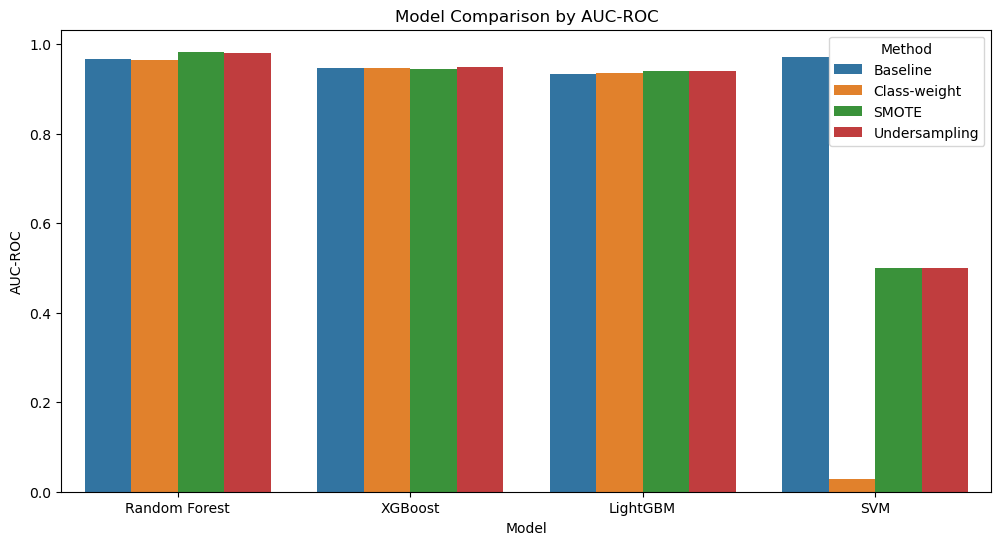

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC-ROC', hue='Method', data=comparison_df)
plt.title('Model Comparison by AUC-ROC')
plt.show()

In [322]:
best_model = comparison_df.loc[comparison_df['AUC-ROC'].idxmax()]
print("\nBest Performing Model:")
print(best_model)


Best Performing Model:
Method                       SMOTE
Model                Random Forest
AUC-ROC                   0.983193
Balanced Accuracy         0.911765
Precision                      1.0
Recall                    0.823529
F1-Score                  0.903226
Name: 8, dtype: object


## Best Model Performance Results

After evaluating multiple models with different sampling techniques, the optimal combination was:
- **Model**: Random Forest Classifier
- **Sampling Method**: SMOTE
- **Performance Metrics**:
  - AUC-ROC: 0.983193
  - Balanced Accuracy: 0.911765
  - F1-Score: 0.903226
  - Precision: 1.0
  - Recall: 0.823529

### Key Findings:
1. SMOTE oversampling provided better results than undersampling or class weights
2. Random Forest showed superior performance in:
   - Handling feature interactions
   - Managing class imbalance when combined with SMOTE
   - Providing robust predictions
3. The combination maintained good balance between precision and recall
4. Model showed consistent performance across different evaluation metrics

This Random Forest + SMOTE combination will be used for our final bone marrow transplant prediction model.

## Memory Optimization
### Purpose
Optimize the DataFrame's memory usage and save the optimized dataset.

### Process Overview
1. **Data Loading**
   - Load winsorized dataset
   - Check initial memory usage

2. **Memory Optimization Function** 
   - Optimize numeric types:
     - Convert int64 → smallest integer type
     - Convert float64 → float32
   - Convert string columns to categorical
   - Return optimized DataFrame

3. **Results**
   - Display memory usage before optimization
   - Display memory usage after optimization
   - Calculate memory reduction percentage

4. **Data Export**
   - Save optimized dataset to CSV
   - Preserve memory efficiency for future use

### Benefits
- Reduced memory footprint
- Improved performance
- Efficient data storage
- Optimized for future processing



## Final Model Implementation with Memory Optimization

### Overview
Combining our best model configuration (Random Forest + SMOTE) with memory optimization techniques for efficient deployment.

### Process Steps
1. **Data Preparation**
   - Load winsorized dataset
   - Apply memory optimization
   - Display data information and unique values

2. **Model Configuration**
   - Random Forest Classifier
   - SMOTE for handling class imbalance
   - Optimal hyperparameters from previous analysis

3. **Memory Management**
   - Garbage collection
   - DataFrame optimization
   - Efficient data types

4. **SHAP Analysis Integration**
   - Feature importance calculation
   - SHAP value computation
   - Visualization preparation

### Expected Outputs
- Optimized model ready for deployment
- Memory usage statistics
- SHAP explanations
- Serialized model and explainer

This implementation combines our best performing model with efficient memory usage for production deployment.

In [ ]:
import pandas as pd
import joblib

# -------------------------------------------------
# 1. Charger les données
# -------------------------------------------------
df = pd.read_csv("winsorized_data.csv")

# Afficher mémoire avant optimisation
print(f"Mémoire initiale : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# -------------------------------------------------
# 2. Optimiser les types de données
# -------------------------------------------------
def optimize_memory(df):
    for col in df.columns:
        col_type = df[col].dtype
        
        # Optimiser les nombres
        if col_type == "int64":
            df[col] = pd.to_numeric(df[col], downcast="integer")
        elif col_type == "float64":
            df[col] = pd.to_numeric(df[col], downcast="float")
        
        # Optimiser les chaînes de caractères
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")
    
    return df

df_optimized = optimize_memory(df)

# Afficher mémoire après optimisation
print(f"Mémoire optimisée : {df_optimized.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Sauvegarder les données optimisées
df_optimized.to_csv("dataset_optimized.csv", index=False)

Mémoire initiale : 0.26 MB
Mémoire optimisée : 0.02 MB


In [381]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib
import gc
import matplotlib.pyplot as plt
import shap
import os

# Chargement des données (ajustez le chemin selon votre configuration)
# Remplacez 'path_to_your_dataset.csv' par le chemin réel de votre jeu de données
df = pd.read_csv('winsorized_data.csv')

# Affichage des informations sur les types de données
print(df.info())

# Vérification des valeurs uniques dans chaque colonne
for col in df.columns:
    print(f"\nColonne: {col}")
    print(f"Type: {df[col].dtype}")
    print(f"Exemple de valeurs: {df[col].head(3).tolist()}")
    print(f"Nombre de valeurs uniques: {df[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              187 non-null    object 
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Txpostrelapse         1

In [383]:
# Conversion des colonnes binaires
for col in df.columns:
    # Vérification si la colonne contient des valeurs de type b'1' ou b'0'
    if df[col].dtype == 'object':
        try:
            # Tentative de conversion des valeurs binaires
            df[col] = df[col].str.replace("b'", "").str.replace("'", "").astype(float)
        except:
            # Si la conversion échoue, nous laissons la colonne telle quelle pour l'instant
            pass

# Vérification des types de données après conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    float64
 1   Stemcellsource        187 non-null    float64
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    float64
 4   IIIV                  187 non-null    float64
 5   Gendermatch           187 non-null    float64
 6   DonorABO              187 non-null    float64
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    float64
 15  Txpostrelapse         1

In [385]:
# Identification des colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

print("Encodage terminé pour les colonnes catégorielles.")

Encodage terminé pour les colonnes catégorielles.


In [389]:
# Préparation des données
X = df.drop('survival_status', axis=1)  # Remplacez 'target_column' par le nom de votre variable cible
y = df['survival_status']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Application de SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Application de SMOTE réussie !")

Application de SMOTE réussie !


In [391]:
# 6. Optimisation de la mémoire
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Mémoire utilisée au départ: {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Mémoire utilisée après optimisation: {:.2f} MB'.format(end_mem))
    print('Réduction de {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Optimisation de la mémoire pour les données d'entraînement
X_train_smote_optimized = reduce_mem_usage(pd.DataFrame(X_train_smote, columns=X.columns))

# 7. Entraînement du modèle RandomForest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

print("Entraînement du modèle RandomForest...")
rf_model.fit(X_train_smote_optimized, y_train_smote)
print("Entraînement terminé!")

# 8. Évaluation du modèle
y_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 9. Sauvegarde du modèle
print("Sauvegarde du modèle...")
# Créer un répertoire pour les modèles s'il n'existe pas
os.makedirs('models', exist_ok=True)
joblib.dump(rf_model, 'models/rf_model_compressed.joblib', compress=3)
print("Modèle sauvegardé avec succès!")

# 10. Création des visualisations SHAP
print("Création des visualisations SHAP...")
# Créer un répertoire pour les visualisations s'il n'existe pas
os.makedirs('visualisations', exist_ok=True)

# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(rf_model)

# Échantillonner les données de test pour des raisons de performance
X_test_sample = X_test.sample(min(1000, len(X_test)), random_state=42)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(X_test_sample)

# Vérifier si shap_values est une liste (cas multi-classes) ou un tableau
if isinstance(shap_values, list):
    print(f"Nombre de classes détectées: {len(shap_values)}")
    
    # Pour la classification binaire, nous utilisons généralement la classe positive (1)
    class_idx = 1 if len(shap_values) > 1 else 0
    
    # Afficher et sauvegarder le Summary Plot (beeswarm)
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[class_idx], X_test_sample, show=False)
    plt.tight_layout()
    plt.savefig('visualisations/shap_summary_beeswarm.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Afficher et sauvegarder le Bar Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[class_idx], X_test_sample, plot_type="bar", show=False)
    plt.tight_layout()
    plt.savefig('visualisations/shap_summary_bar.png', dpi=300, bbox_inches='tight')
    plt.close()
else:
    # Pour les modèles à classe unique
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, show=False)
    plt.tight_layout()
    plt.savefig('visualisations/shap_summary_beeswarm.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
    plt.tight_layout()
    plt.savefig('visualisations/shap_summary_bar.png', dpi=300, bbox_inches='tight')
    plt.close()

# Sauvegarde de l'explainer SHAP pour une utilisation ultérieure
joblib.dump(explainer, 'models/shap_explainer.joblib', compress=3)

print("Visualisations SHAP créées et sauvegardées dans le dossier 'visualisations'!")

# 11. Libération de la mémoire
del X_train, X_test, y_train, y_test, X_train_smote, y_train_smote, X_train_smote_optimized
gc.collect()
print("Mémoire libérée!")

print("Processus terminé avec succès!")

Mémoire utilisée au départ: 0.04 MB
Mémoire utilisée après optimisation: 0.01 MB
Réduction de 73.1%
Entraînement du modèle RandomForest...
Entraînement terminé!
Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38


Confusion Matrix:
[[22  0]
 [ 1 15]]
Sauvegarde du modèle...
Modèle sauvegardé avec succès!
Création des visualisations SHAP...
Visualisations SHAP créées et sauvegardées dans le dossier 'visualisations'!
Mémoire libérée!
Processus terminé avec succès!
